# Onboarding POC

## Final target

Have a json with this info 

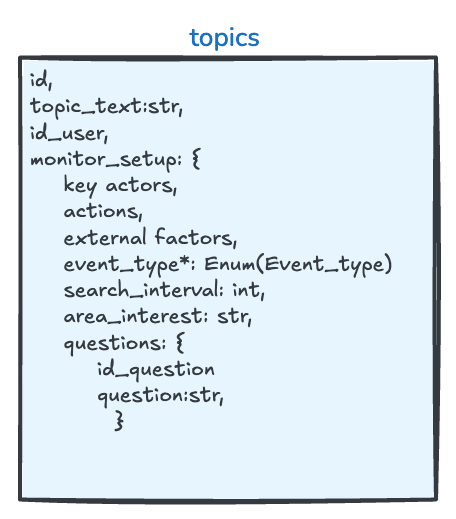

# Setup

In [ ]:
import os
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

# Functions

In [ ]:
client = openai.OpenAI()

# def get_completion(prompt, model="gpt-3.5-turbo"):
def get_completion(prompt, model="gpt-4o-mini"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

# def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
def get_completion_from_messages(messages, model="gpt-4o-mini", temperature=0):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message.content

# Prompt

In [31]:
delimiter = "####"

user_interest = """
i'm interested in the Ucrania and Rusia war
"""

prompt_ver1 = f"""
You are tasked with generating a series of 6-10 specific forecasting questions based on a user's stated area of interest. These questions will be used in a news-based forecasting platform to monitor potential changes in the situation. Follow the guidelines below:
	1.Analyze the Area of Interest:
	  - Break down the user's interest into key themes, events, or entities.
	Identify significant aspects that could influence future developments.
	2.	Generate Specific Forecasting Questions:
	  - Formulate questions predicting the probability of specific events occurring by meaningful future dates (beyond a 1-2 month horizon).
	  - Ensure each question is clear, unambiguous, and focuses on a single event.
	3.	Ensure Diversity and Relevance:
	  - Cover a range of different aspects within the area of interest.
	  - Include events that, if they occur, would result in a significant (10-20%) change in prediction probabilities.
	  - Avoid repetition and overlap between questions.
	4.	Use Meaningful Dates:
	  - Select future dates that are appropriate and significant for the predicted events.
	  - Ensure the timeframes are realistic for the events to occur.
	5.	Formatting:
	  - Present the questions in a numbered list.
	  - Each question should be a single sentence ending with a question mark.
    6.	The user's stated area of interest will be delimited with {delimiter} characters.

Example:
User's Area of Interest: {delimiter}Developments in renewable energy policies in Asia.{delimiter}
Generated Forecasting Questions:
	1.	Will China announce a new national plan to achieve carbon neutrality by 2050 before March 31, 2024?
	2.	Will India surpass 100 GW of installed solar power capacity by December 31, 2024?
	3.	Will Japan increase its renewable energy target to over 30% by June 30, 2024?
	4.	Will any Southeast Asian country introduce a carbon tax by September 30, 2024?
	5.	Will South Korea commit to phasing out coal power by 2040 before July 31, 2024?
	6.	Will the Asian Development Bank pledge over $5 billion in new funding for renewable energy projects by May 31, 2024?

Now, proceed to generate the forecasting questions based on the user's area of interest provided below.

User's Area of Interest:
{delimiter}{user_interest}{delimiter}
Note: Ensure that all events are plausible and that the questions are framed neutrally without bias or assumptions. The goal is to create meaningful questions that can be used to monitor changes in the situation effectively.
"""


prompt_ver2 = f"""
A user is interested in tracking a specific topic, such as the performance of a sports team, geopolitical events in a region, or business/financial developments. Your task is to generate 6 to 10 diverse and specific forecasting questions based on their interest. Each question should focus on predicting the probability of a relevant event happening by a certain date, typically over a 1- to 12-month horizon. The questions should vary in type (e.g., probable events, disruptive events, trends, or thresholds) to ensure comprehensive coverage. Follow these steps:
	1.	Understand the User's Interest: Ask the user to provide details on their area of interest:
	  - What is the topic they want to monitor?
	  - Are there specific actors, trends, or events that they consider most important?
	  - What is the timeframe they are interested in?
	2.	Identify Key Actors and Drivers: Based on the topic, list the key actors, actions, and external factors that could significantly influence outcomes. For example, for a sports team, this could include player performance, injuries, coaching changes, or rival teams. For a geopolitical event, it might involve countries, military actions, or trade policies.
	3.	Break the Topic into Event Types: Break down the topic into different event types, including:
	  - Disruptive events: Sudden changes that could shift probabilities.
	  - Trend-driven events: Outcomes tied to ongoing developments.
	  - Milestone events: Important dates when a specific outcome is expected.
	4.	Generate Specific Questions: For each event type, create forecasting questions. Each question should:
	  - Predict the likelihood of a specific event happening by a certain date.
	  - Consider various dimensions like the actions of key actors, changes in trends, and external factors.
	  - Incorporate diversity, including probable events, low-probability but high-impact events, and trend-based predictions.
	5.	Specify the Timeframe: For each question, determine a specific timeframe (e.g., “within 3 months,' “by [specific date]') based on the user's interest.
	6.	The user's stated area of interest will be delimited with {delimiter} characters.

Sample Output Question: {delimiter}Geopolitical Events in the South China Sea{delimiter}:
	1.	Disruptive event:
	  - 'By July 1st, 2024, will China deploy any new military installations on artificial islands in the South China Sea?'
	2.	Trend-driven event:
	  - 'Will there be a 10 percent of increase in reported naval confrontations between China and the U.S. in the South China Sea by the end of Q1 2024?'
"""

print(prompt_ver1)
print(f"{delimiter}{user_interest}{delimiter}")



You are tasked with generating a series of 6-10 specific forecasting questions based on a user's stated area of interest. These questions will be used in a news-based forecasting platform to monitor potential changes in the situation. Follow the guidelines below:
	1.Analyze the Area of Interest:
	  - Break down the user's interest into key themes, events, or entities.
	Identify significant aspects that could influence future developments.
	2.	Generate Specific Forecasting Questions:
	  - Formulate questions predicting the probability of specific events occurring by meaningful future dates (beyond a 1-2 month horizon).
	  - Ensure each question is clear, unambiguous, and focuses on a single event.
	3.	Ensure Diversity and Relevance:
	  - Cover a range of different aspects within the area of interest.
	  - Include events that, if they occur, would result in a significant (10-20%) change in prediction probabilities.
	  - Avoid repetition and overlap between questions.
	4.	Use Meaningful 

## Prompt 1 - test

In [32]:
messages = [
    {"role": "system", "content": prompt_ver1},
]

response = get_completion_from_messages(messages, temperature=0)
print(response)

Generated Forecasting Questions:
1. Will Ukraine and Russia reach a ceasefire agreement by December 31, 2022?
2. Will NATO increase its military presence in Eastern Europe in response to the Ukraine-Russia conflict by June 30, 2023?
3. Will the United Nations broker peace talks between Ukraine and Russia before September 30, 2023?
4. Will economic sanctions imposed on Russia lead to a significant decrease in its GDP growth by March 31, 2023?
5. Will there be a significant increase in the number of internally displaced persons (IDPs) in Ukraine due to the conflict by December 31, 2023?
6. Will the European Union provide additional humanitarian aid to Ukraine to support those affected by the conflict by June 30, 2023?
7. Will there be a change in leadership in either Ukraine or Russia as a result of the ongoing conflict by September 30, 2023?
8. Will the conflict between Ukraine and Russia escalate to involve other neighboring countries by March 31, 2024?
9. Will there be a UN-backed pea

## Prompt 2 - test

In [33]:
messages = [
    {"role": "system", "content": prompt_ver2},
    {"role": "user", "content": f"{delimiter}{user_interest}{delimiter}"},
]

response = get_completion_from_messages(messages, temperature=0)
print(response)

**Key Actors and Drivers:**
- **Ukraine:** Military capabilities, diplomatic efforts, internal stability.
- **Russia:** Military actions, political decisions, international relations.
- **International Community:** Sanctions, peace negotiations, support for either side.

**Event Types:**
1. **Disruptive Event:**
   - 'By the end of the next 6 months, will there be a significant escalation in military conflict between Ukraine and Russia, involving a major city or strategic location?'
   
2. **Trend-driven Event:**
   - 'Will there be a 20% increase in ceasefire violations along the Ukraine-Russia border by the end of the next 3 months?'

3. **Milestone Event:**
   - 'By the end of this year, will there be a formal peace agreement signed between Ukraine and Russia, with international mediation?'

4. **Probable Event:**
   - 'Within the next 4 months, will there be a change in leadership in either Ukraine or Russia that impacts the dynamics of the conflict?'

5. **Threshold Event:**
   - 